In [1]:
import sqlite3
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
from enum import Enum
from skimage import data
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
class Participant(Enum):
     none = 0
     adult = 1
     child = 2
     pet = 3

conn = sqlite3.connect('sessions.db')
c = conn.cursor()

rows = [r for r in c.execute('SELECT * FROM readings')]
image_paths = ['image_data/{}'.format(r[5]) for r in rows]
X = [data.imread(p) for p in image_paths]
Y = [Participant[r[2]].value for r in rows]

# Face sample image sizes
We want to determine how big the sliding window should be. This can be determined by boxplotting the image areas and scatter plotting the demensions.

In [3]:
saved_face_regions = np.load('face_regions.npy')

# y = row[1][0]
# x = row[1][1]
# height = row[1][2]
# width = row[1][3]
areas = [(int(row[1][3]) * int(row[1][2])) for row in saved_face_regions]
dimensions = [(row[1][3], row[1][2]) for row in saved_face_regions]

In [4]:
# Total image size:
X[0].shape

(60, 80)

(array([ 21.,  17.,  34.,  22.,  16.,   2.,   0.,   1.,   0.,   1.]),
 array([  228. ,   320.7,   413.4,   506.1,   598.8,   691.5,   784.2,
          876.9,   969.6,  1062.3,  1155. ]),
 <a list of 10 Patch objects>)

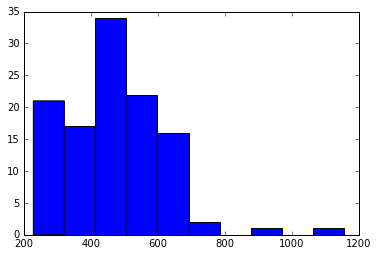

In [5]:
plt.hist(areas)

{'boxes': [<matplotlib.lines.Line2D at 0x1151c7c88>],
 'caps': [<matplotlib.lines.Line2D at 0x11527eda0>,
 'fliers': [<matplotlib.lines.Line2D at 0x115285f28>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x115285710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x115277d30>,
  <matplotlib.lines.Line2D at 0x115277e80>]}

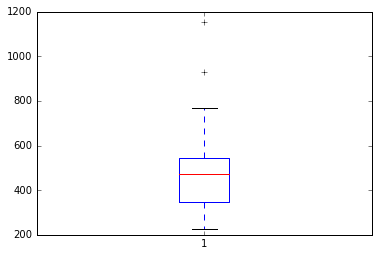

In [6]:
plt.boxplot(areas)

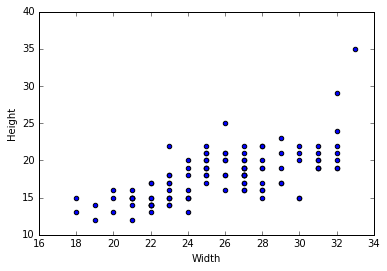

In [7]:
widths = list(zip(*dimensions))[0]
heights = list(zip(*dimensions))[1]
plt.scatter(widths, heights)
plt.xlabel('Width')
plt.ylabel('Height')

([<matplotlib.axis.XTick at 0x11528cd68>,
 <a list of 2 Text xticklabel objects>)

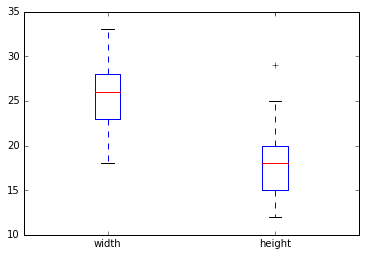

In [8]:
plt.boxplot([widths, heights])
plt.xticks(range(1,3), ['width', 'height'])

In [9]:
median_width = np.median(widths)
median_height = np.median(heights)

print('Area median: {}'.format(np.median(areas)))
print('Width median: {}'.format(median_width))
print('Height median: {}'.format(median_height))

Area median: 471.5
Width median: 26.0
Height median: 18.0


# Attempt Cropping to Median Dimensions

In [10]:
len(saved_face_regions)

114

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


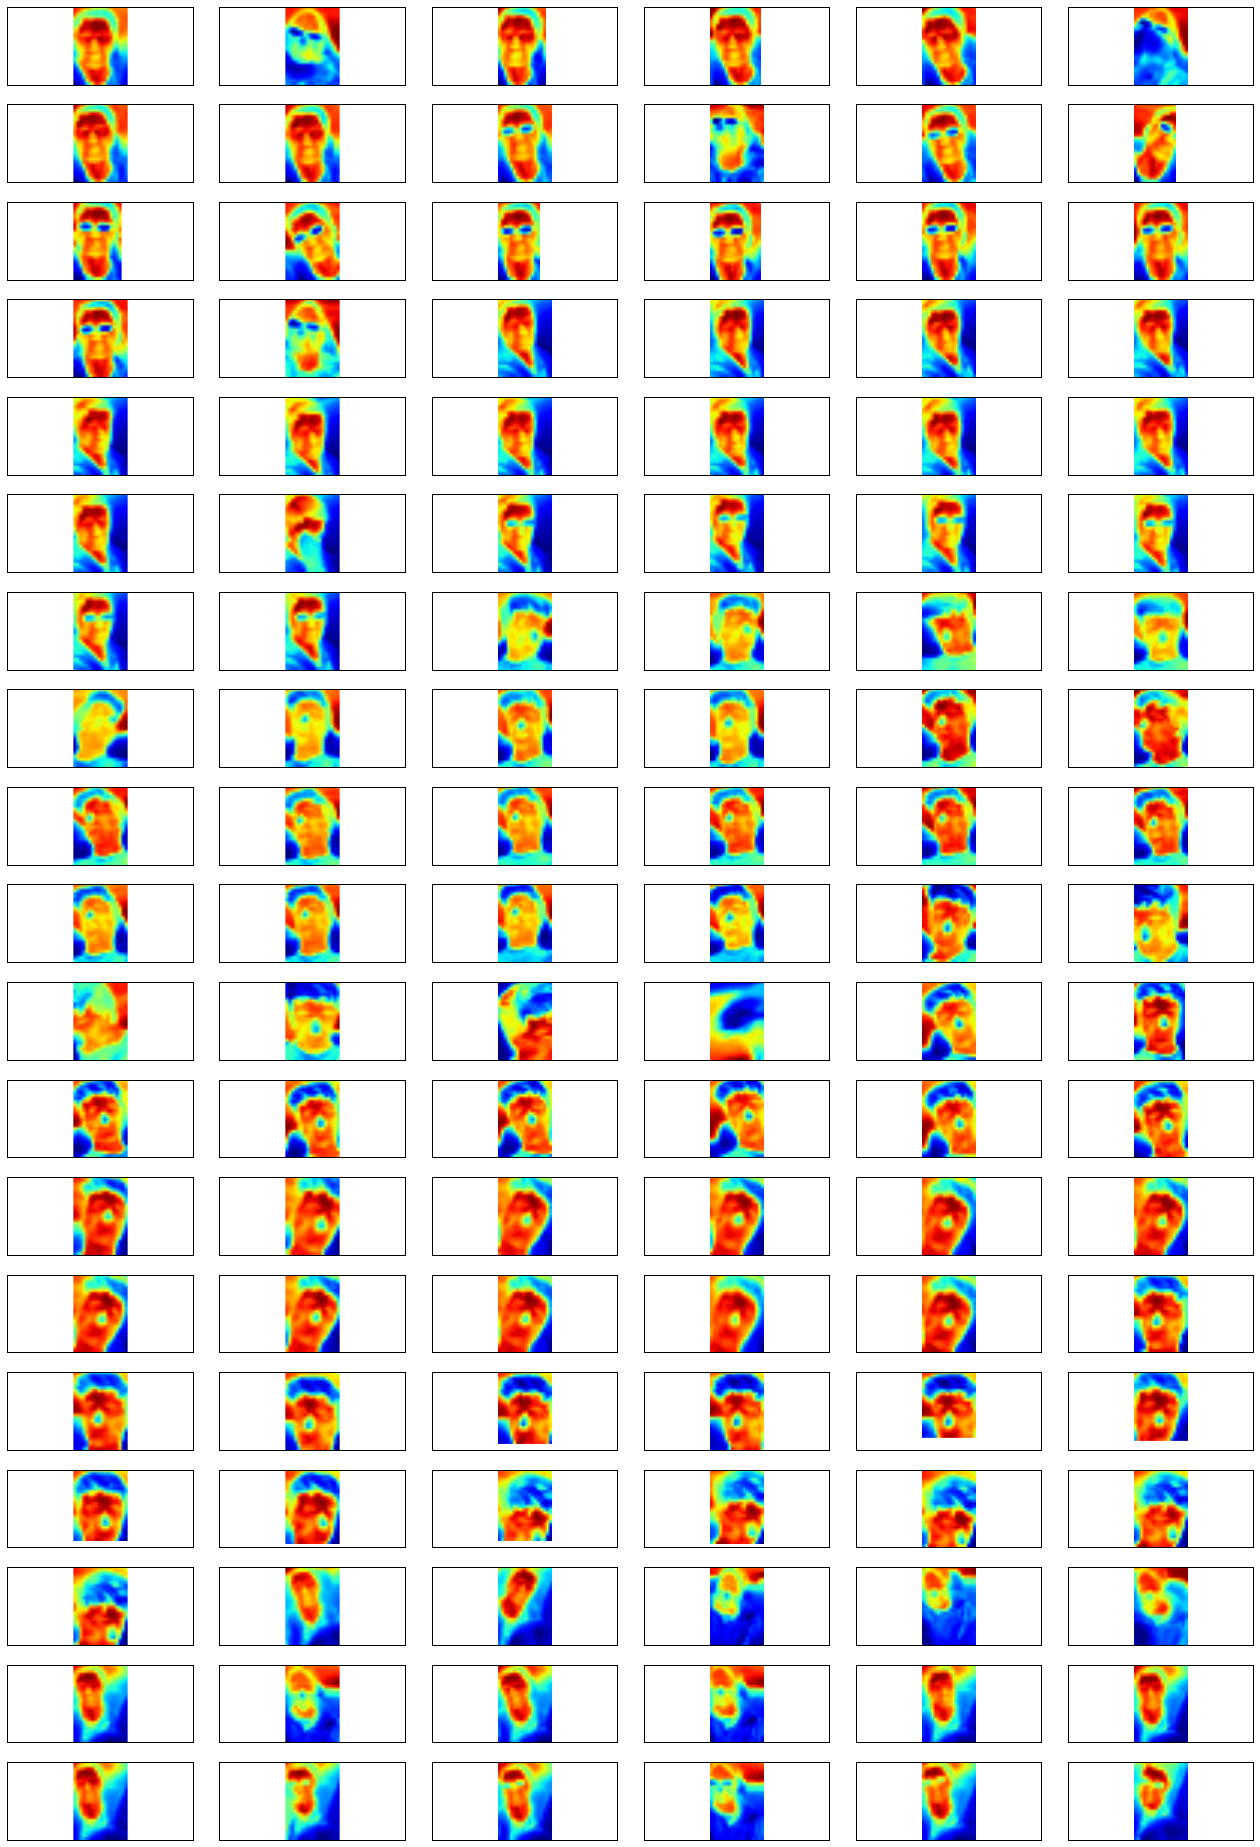

In [11]:
plot_per_row = 6;
plot_num_rows = int(np.ceil(len(saved_face_regions)/plot_per_row))
# plot_num_rows = int(np.ceil(4/plot_per_row))
fig, ax = plt.subplots(plot_num_rows, plot_per_row, figsize=(median_height,median_width), sharex=True,sharey=True)
fig.tight_layout()
for i in range(len(saved_face_regions)):
    row = saved_face_regions[i]
    img = data.imread(row[0])
    y = row[1][0]
    x = row[1][1]
    height = row[1][2]
    width = row[1][3]
    
    col = i % plot_per_row
    row = int(i / plot_per_row)
    ax[row, col].set_xticks([])
    ax[row, col].set_yticks([])
    ax[row, col].imshow(img[x:x+median_width,y:y+median_height])
